In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Import the Boston house price dataset

In [ ]:
hp_data = sklearn.datasets.fetch_california_housing()
hp_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
hp_df = pd.DataFrame(hp_data.data, columns = hp_data.feature_names) #why columns? - to have the names of the columns

In [ ]:
hp_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#input the price separately
#target column

hp_df["Price"] = hp_data.target

In [ ]:
hp_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
hp_df.shape

(20640, 9)

In [ ]:
hp_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
hp_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
hp_df["Price"].value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: Price, Length: 3842, dtype: int64

Understanding the correlation between features

1. Positive correlation (direct proportion)

2. Negative correlation (inverse proportion)

In [ ]:
correlation = hp_df.corr()

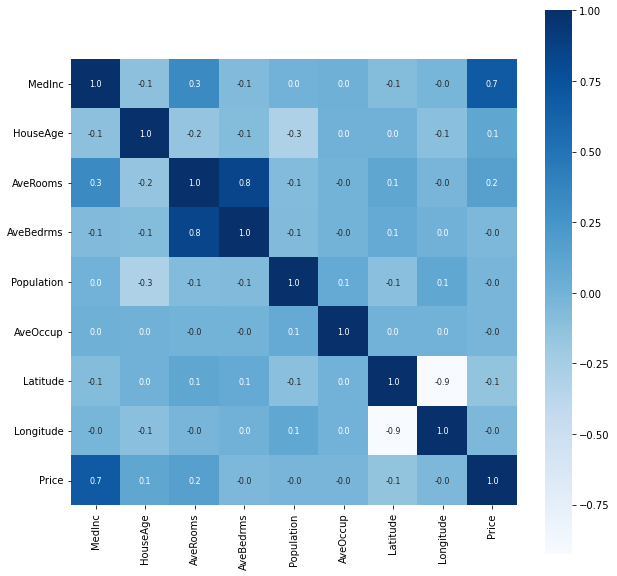

In [ ]:
# construct a heatmap to understand the correlation
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')
# .1f = 1 value after the point
# annot = feature names
# annot_kws = size

In [ ]:
hp_df.groupby("Price").mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
Price,,,,,,,,
0.14999,2.122475,30.750000,6.575951,2.016259,305.25000,2.566440,37.665000,-120.197500
0.17500,2.366700,39.000000,3.572464,1.217391,259.00000,1.876812,34.150000,-118.330000
0.22500,1.818075,36.250000,3.975628,1.265805,2112.00000,3.652335,36.005000,-119.335000
0.25000,0.857100,21.000000,1.629630,1.222222,64.00000,2.370370,32.790000,-114.650000
0.26600,2.301300,34.000000,4.897959,1.051020,808.00000,2.748299,35.130000,-119.450000
...,...,...,...,...,...,...,...,...
4.98800,8.248000,29.000000,7.072727,0.978182,826.00000,3.003636,37.330000,-122.060000
4.99000,8.148900,18.000000,6.600817,1.001362,1634.00000,2.226158,37.890000,-122.180000
4.99100,6.786100,28.000000,7.386861,1.083942,617.00000,2.251825,33.550000,-117.770000


In [ ]:
X = hp_df.drop(columns = "Price", axis = 1)
Y = hp_df["Price"]

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (18576, 8) (2064, 8)


Model training using XGboost

decision tree model that uses ensemble model (more than one model combined)

In [ ]:
#load the model
model = XGBRegressor()

In [ ]:
#train the model
model.fit(X_train, Y_train)

[13:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluate the model

evaluation metrics - not accuracy score in this project, because u cannot use it for regression

In [ ]:
# accuracy for prediction on training data

training_data_prediction = model.predict(X_train)

In [ ]:
# R squared error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error: ", score_1) # if not close to 0, then performance is not good
print("mean absolute error: ", score_2)


R squared error:  0.8049727202780057
mean absolute error:  0.355127166335556


Visualize the actual prices vs predicted prices

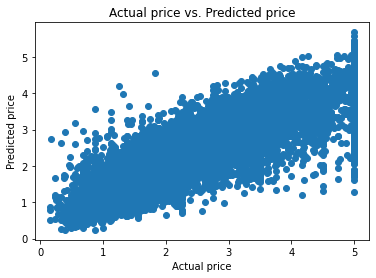

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs. Predicted price")
plt.show()

In [ ]:
# accuracy for prediction on test data

test_data_prediction = model.predict(X_test)

score_1 = metrics.r2_score(Y_test, test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error: ", score_1) # if not close to 0, then performance is not good
print("mean absolute error: ", score_2)

R squared error:  0.7785487932592571
mean absolute error:  0.3700059137020601
